In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
dreams = pd.read_csv("dreams.csv", index_col=0)

In [32]:
dreams.date = pd.to_datetime(dreams.date)

In [33]:
dreams["month"] = dreams.date.dt.month
dreams["quarter"] = dreams.date.dt.to_period("Q")
dreams["day"] = dreams.date.dt.weekday
dreams["characters"] = dreams.content.str.len()

In [34]:
content_filter = (dreams["content"] != "no memory") & (dreams["content"] != "weak memory")

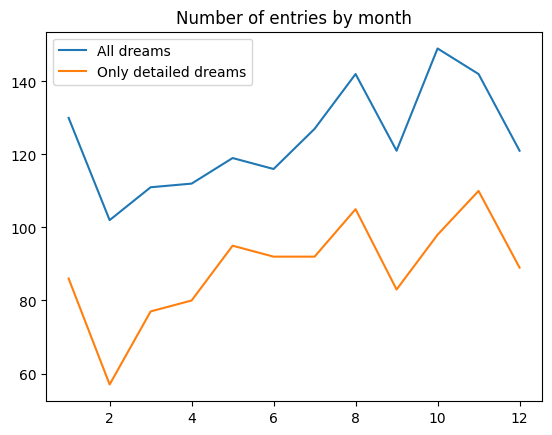

In [35]:
plt.plot(dreams.groupby("month").count()["date"])
plt.plot(dreams[content_filter].groupby("month").count()["date"])
plt.title("Number of entries by month")
plt.legend(["All dreams", "Only detailed dreams"]);

In [36]:
dreams.shape[0]

1492

In [37]:
dreams = dreams[content_filter]

In [38]:
dreams[(dreams.category.str.len() < 5) & (dreams.category != "[]")].category

Series([], Name: category, dtype: object)

In [39]:
from ast import literal_eval
dreams.people = dreams.people.apply(literal_eval)
dreams.female = dreams.female.apply(literal_eval)
dreams.category = dreams.category.apply(literal_eval)
dreams.locations = dreams.locations.apply(literal_eval)
dreams.entities = dreams.entities.apply(literal_eval)
dreams.people_tag = dreams.people_tag.apply(literal_eval)

In [40]:
gender = dreams.explode("female").groupby("female").count()["date"]
gender = gender.rename({False: "male", True: "female"})
gender

female
male      251
female    251
Name: date, dtype: int64

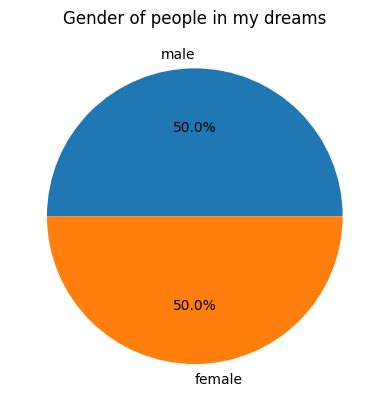

In [41]:
fig, ax = plt.subplots()
ax.pie(gender, labels=gender.index, autopct='%1.1f%%')
ax.set_title("Gender of people in my dreams");

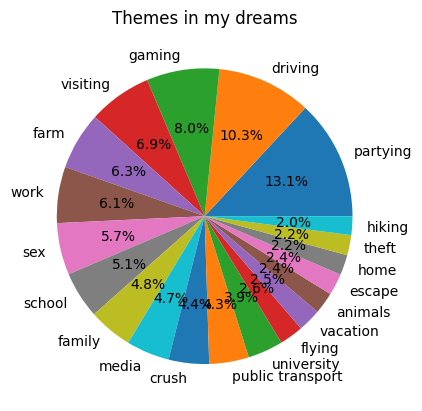

In [42]:

categories = dreams.explode("category").groupby("category").count()["date"].sort_values(ascending=False)
categories = categories[categories.values > 23]
fig, ax = plt.subplots()
ax.pie(categories, labels=categories.index, autopct='%1.1f%%')
ax.set_title("Themes in my dreams");

Text(0.5, 1.0, 'Dreams about partying by month')

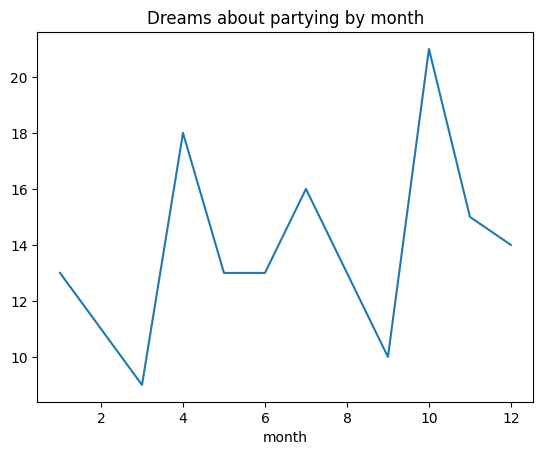

In [43]:
parties = dreams[dreams.category.apply(lambda x: "partying" in x)].groupby("month").count()["content"]
parties.plot()
plt.title("Dreams about partying by month")

Text(0.5, 1.0, 'Dreams about sex by quarter')

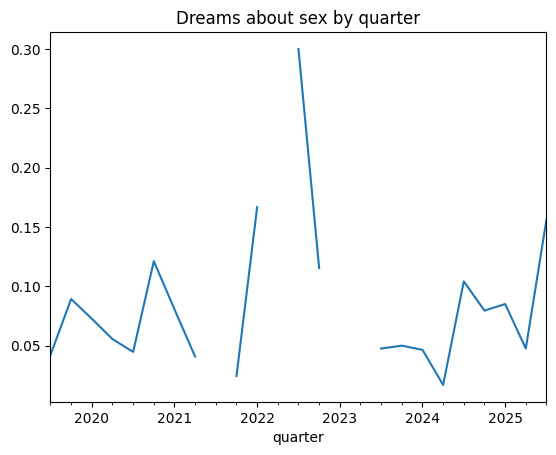

In [44]:
sex = dreams[dreams.category.apply(lambda x: "sex" in x)]
sex = sex.groupby("quarter").count()["content"] / dreams.groupby("quarter").count()["content"]
sex.plot()
plt.title("Dreams about sex by quarter")

In [45]:
sex = dreams[dreams.category.apply(lambda x: "partying" in x)]
sex.groupby("day").count()["date"]

day
0    18
1    26
2    25
3    27
4    36
5    23
6    11
Name: date, dtype: int64

In [46]:
dreams.groupby("day").mean(numeric_only=True)["characters"]

day
0    67.071429
1    54.125000
2    60.324675
3    79.804878
4    65.746835
5    74.943089
6    57.654867
Name: characters, dtype: float64

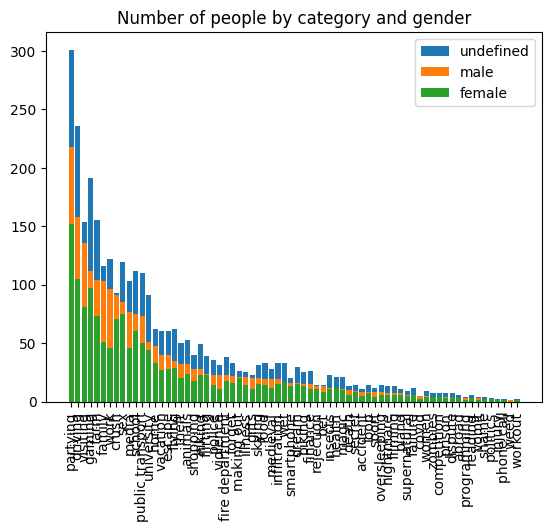

In [47]:
categories = dreams.explode("female")
categories = categories.explode("category")
categories.female = categories.female.astype(bool)
undefined = dreams[dreams.female.apply(lambda x: len(x)) == 0].explode("category")
gender = categories[categories.female.notna()]
female = gender[gender.female]
male = gender[~gender.female]
index = categories.groupby("category").count()["date"].sort_values(ascending=False).index
female = female.groupby("category").count()["date"]
female = female.reindex(index, fill_value=0)
male = male.groupby("category").count()["date"]
male = male.reindex(index, fill_value=0)
male += female
undefined = undefined.groupby("category").count()["date"]
undefined = undefined.reindex(index, fill_value=0)
undefined += male
plt.bar(index, undefined);
plt.bar(index, male);
plt.bar(index, female);
plt.xticks(rotation=90);
plt.legend(["undefined", "male", "female"])
plt.title("Number of people by category and gender");

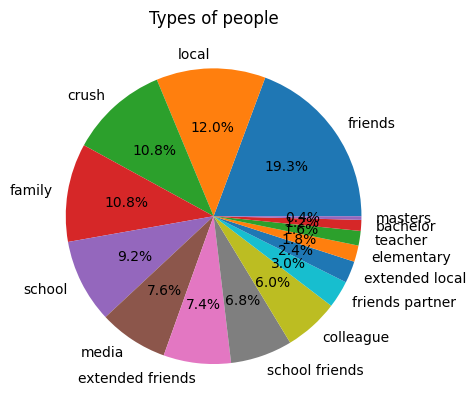

In [48]:
people_tag_count = dreams.explode("people_tag").groupby("people_tag").count()["date"].sort_values(ascending=False)
fig, ax = plt.subplots()
ax.pie(people_tag_count, labels=people_tag_count.index, autopct='%1.1f%%')
ax.set_title("Types of people");

In [49]:
people_tags = pd.get_dummies(dreams.set_index("date")["people_tag"].explode()).groupby("date").any()

In [50]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(grid, title=None):
    all_tags = grid.columns
    all_dates = grid.index

    fig, ax = plt.subplots(figsize=(10, 5))

    # Define a colormap: transparent for 0, color for 1
    cmap = plt.cm.get_cmap("tab20", len(all_tags))
    colors = {tag: cmap(i) for i, tag in enumerate(all_tags)}

    # Plot each cell
    for i, date in enumerate(grid.index):
        for j, tag in enumerate(grid.columns):
            val = grid.loc[date, tag]
            if val == 1:
                ax.add_patch(
                    plt.Rectangle(
                        (j - 0.5, i - 0.5),
                        1,
                        1,
                        color=colors[tag],
                        alpha=0.7,
                        edgecolor="gray",
                    )
                )

    # Customize the plot
    ax.set_xticks(range(len(all_tags)))
    ax.set_xticklabels(all_tags, rotation=45, ha="right")
    ax.set_yticks(range(len(grid.index)))
    ax.set_yticklabels(grid.index.strftime("%Y-%m-%d"))
    ax.set_xlim(-0.5, len(all_tags) - 0.5)
    ax.set_ylim(-0.5, len(grid.index) - 0.5)
    ax.grid(False)
    ax.invert_yaxis()

    for i, label in enumerate(ax.get_yticklabels()):
        if i % round(grid.shape[0]/30) != 0:  # Show every other label
            label.set_visible(False)
    if title:
        plt.title(title)
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_27064/1936002406.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", len(all_tags))
/tmp/ipykernel_27064/1936002406.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle(


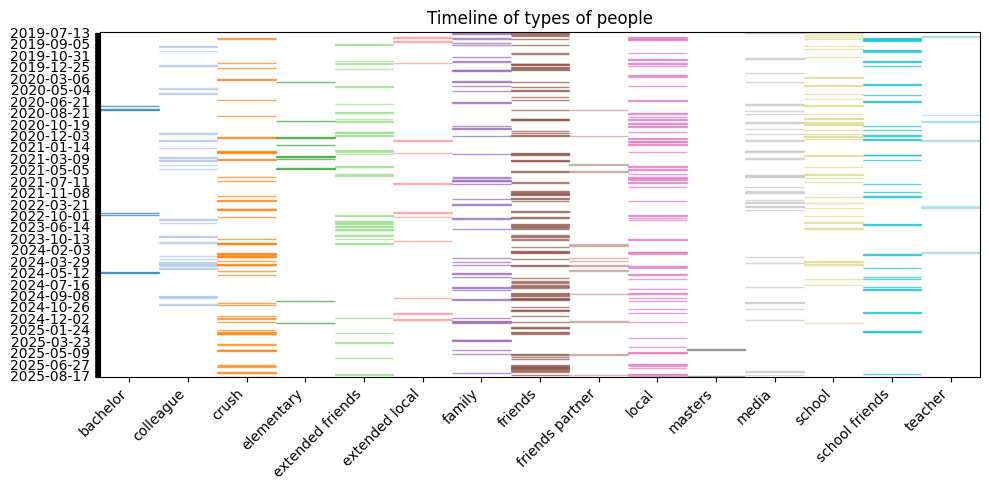

In [51]:
plot_grid(people_tags, "Timeline of types of people")

In [52]:
people = pd.get_dummies(dreams.set_index("date")["people"].explode()).groupby("date").any()
people_count = dreams.explode("people").groupby("people").count()["date"].sort_values(ascending=False)

In [53]:
import itertools
global marked_pairs
marked_pairs = {}
def mark_pairs(x):
    for pair in itertools.combinations(set(x), 2):
        if pair in marked_pairs.keys():
            marked_pairs[pair] += 1
        else:
            marked_pairs[pair] = 1
dreams.people_tag.apply(mark_pairs)

0       None
2       None
3       None
4       None
7       None
        ... 
1488    None
1489    None
1490    None
1491    None
1492    None
Name: people_tag, Length: 1064, dtype: object

In [54]:
marked_pairs

{('school', 'media'): 3,
 ('family', 'friends'): 6,
 ('local', 'extended local'): 2,
 ('family', 'local'): 3,
 ('family', 'school friends'): 2,
 ('family', 'school'): 1,
 ('family', 'crush'): 4,
 ('local', 'school friends'): 4,
 ('local', 'friends'): 6,
 ('local', 'school'): 1,
 ('local', 'crush'): 1,
 ('school friends', 'friends'): 3,
 ('school friends', 'school'): 1,
 ('school friends', 'crush'): 1,
 ('friends', 'school'): 1,
 ('friends', 'crush'): 1,
 ('school', 'crush'): 1,
 ('family', 'extended friends'): 3,
 ('crush', 'extended local'): 1,
 ('crush', 'extended friends'): 4,
 ('extended local', 'extended friends'): 1,
 ('friends', 'extended friends'): 4,
 ('elementary', 'friends'): 1,
 ('school friends', 'extended friends'): 1,
 ('family', 'friends partner'): 2,
 ('crush', 'elementary'): 1,
 ('colleague', 'friends'): 3,
 ('local', 'extended friends'): 3,
 ('friends partner', 'friends'): 4,
 ('school', 'family'): 1,
 ('crush', 'friends'): 5,
 ('crush', 'friends partner'): 2,
 ('loc

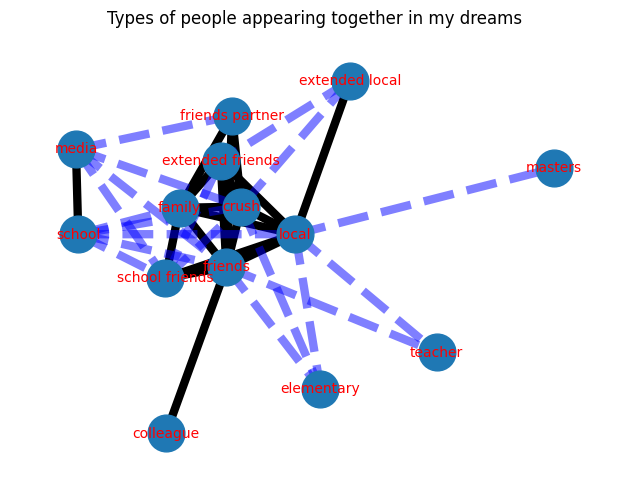

In [55]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

for key, value in marked_pairs.items():
    G.add_edge(key[0], key[1], weight=value)    

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 1]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 1]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif", font_color="red")
# edge weight labels
#edge_labels = nx.get_edge_attributes(G, "weight")
#nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.title("Types of people appearing together in my dreams")
plt.show()


In [56]:
categories = pd.get_dummies(dreams.set_index("date")["category"].explode()).groupby("date").any()
category_count = dreams.explode("category").groupby("category").count()["date"].sort_values(ascending=False)

/tmp/ipykernel_27064/1936002406.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", len(all_tags))
/tmp/ipykernel_27064/1936002406.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle(


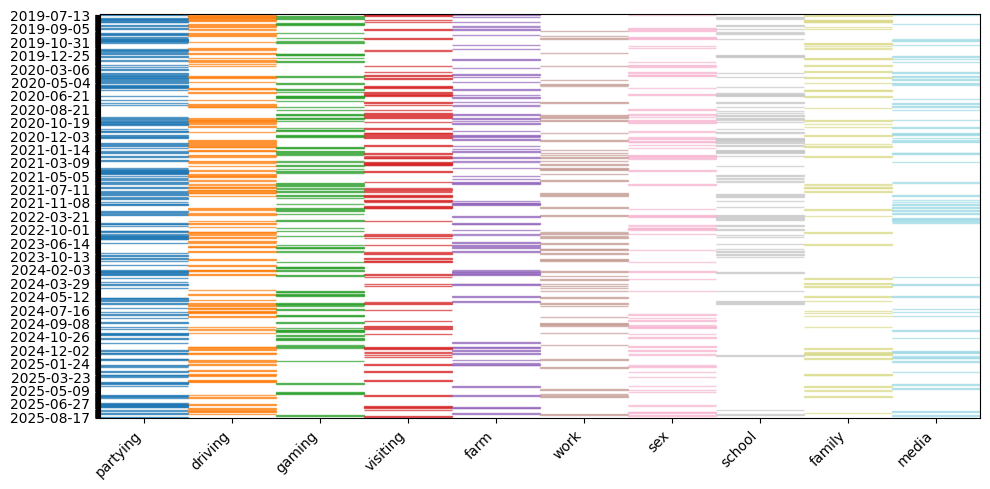

In [57]:
plot_grid(categories[category_count[:10].index])

/tmp/ipykernel_27064/1936002406.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", len(all_tags))
/tmp/ipykernel_27064/1936002406.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle(


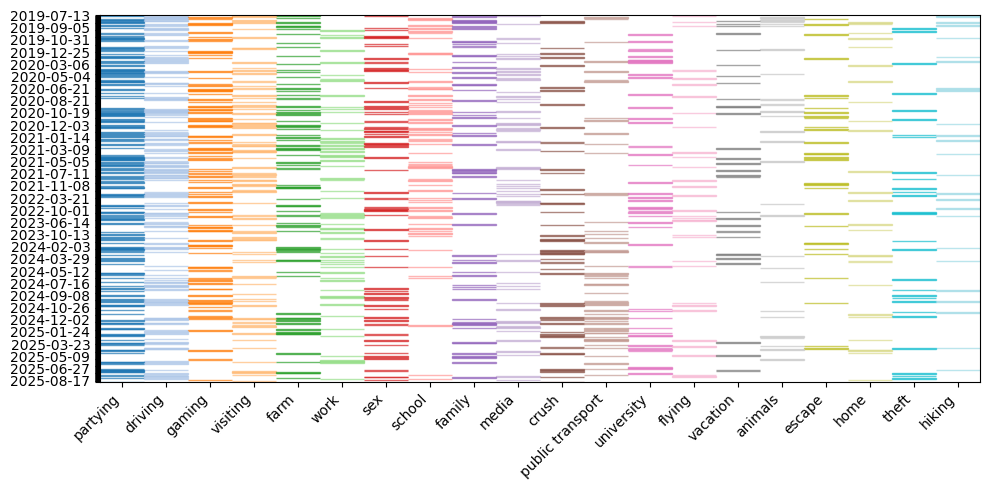

In [58]:
plot_grid(categories[category_count[:20].index])

/tmp/ipykernel_27064/1936002406.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", len(all_tags))
/tmp/ipykernel_27064/1936002406.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle(


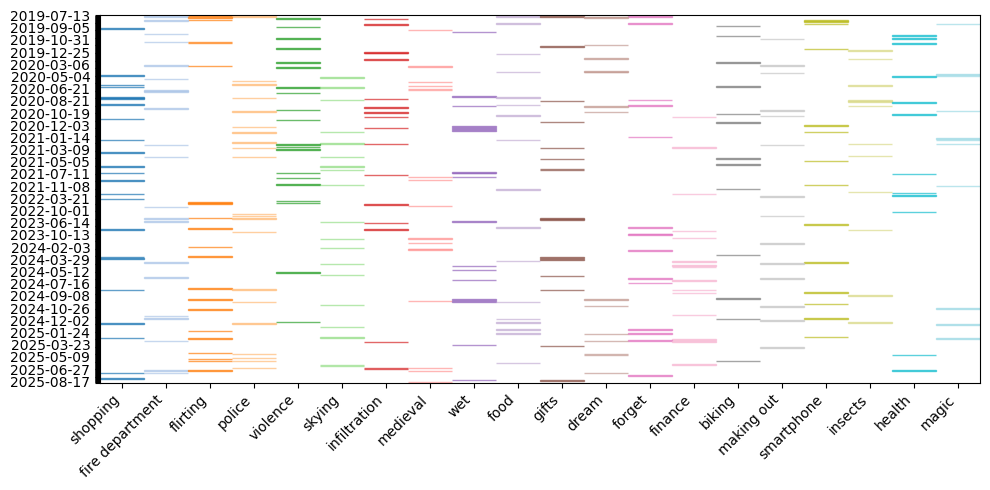

In [59]:
plot_grid(categories[category_count[20:40].index])

In [60]:
corona_index = (dreams.date >= pd.to_datetime("2022-03-21")) & (dreams.date <= pd.to_datetime("2023-04-07"))

In [61]:
corona = pd.DataFrame()
corona["total"] = dreams.explode("category").groupby("category").count()["date"] / dreams.explode("category").shape[0]
corona["corona"] = dreams[corona_index].explode("category").groupby("category").count()["date"] / dreams[corona_index].explode("category").shape[0]

In [62]:
corona = corona.fillna(0)

In [63]:
corona["diff"] = (corona.corona - corona.total) / corona.total

In [64]:
corona.sort_values("diff").head(20)

,total,corona,diff
category,,,
bet,0.001074,0.0,-1.0
biking,0.007519,0.0,-1.0
covid,0.002148,0.0,-1.0
death,0.005371,0.0,-1.0
failure,0.003222,0.0,-1.0
dream,0.008593,0.0,-1.0
dispute,0.002148,0.0,-1.0
filming,0.003759,0.0,-1.0
food,0.009130,0.0,-1.0


In [65]:
dreams[corona_index].shape[0]

54

In [66]:
dates = pd.DataFrame(index=pd.date_range(dreams.date.min(), dreams.date.max()))

In [67]:
dates["dream"] = False
dates.loc[dates.index.isin(dreams.date), "dream"] = True

/tmp/ipykernel_27064/1936002406.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", len(all_tags))
/tmp/ipykernel_27064/1936002406.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle(


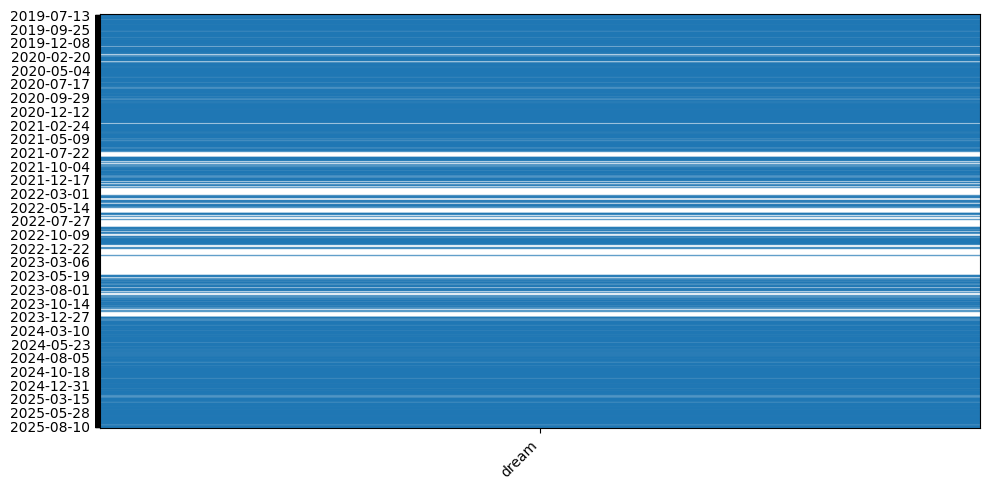

In [68]:
plot_grid(dates)

In [69]:
# Personal data
break

SyntaxError: 'break' outside loop (2677806565.py, line 2)

In [ ]:
plot_grid(people[people_count.head(10).index], "Timeline of top 10 people")

In [ ]:
plot_grid(people[people_count.head(50).index], "Timeline of top 50 people")

In [ ]:
from mappings import people_map
crushes = []
for key, value in people_map.items():
    if value == "crush":
        crushes.append(key)

In [ ]:
plot_grid(people[crushes], "Timeline of my crushes")